# Correlation analysis between news sentiment and stock price

In [1]:
import pandas as pd
import os,sys 

In [2]:
# Get the current working directory (where the notebook is running)
notebook_dir = os.getcwd()
parent_path=os.path.dirname(notebook_dir)

os.chdir(parent_path)
# print(os.getcwd())

### Import sentiment analysis out put data and stock analysis output data for each company

In [3]:
sentiment_data=pd.read_csv('Data\\sentiment_data.csv')

In [41]:
apple_stock_data=pd.read_csv('Data\\Output\\apple_stock_data.csv')
amazon_stock_data=pd.read_csv('Data\\Output\\amazon_stock_data.csv')
google_stock_data=pd.read_csv('Data\\Output\\google_stock_data.csv')
tesla_stock_data=pd.read_csv('Data\\Output\\tesla_stock_data.csv')

## Correlation for Apple

In [15]:
#Extract company's sentiment data
apple_sentiment_data=sentiment_data[sentiment_data['stock']=='AAPL']

In [18]:
# Group by 'date_only' and calculate the mean of 'compound'
result_df = apple_sentiment_data.groupby('date_only')['compound'].mean().reset_index()

# Rename columns
result_df.columns = ['Date', 'Sentiment']


In [27]:
#combining result_df with stock data which have matching dates
apple_aggregate_data = pd.merge(apple_stock_data, result_df, left_on='Date', right_on='Date', how='inner')

In [28]:
#calculate daily returns
apple_aggregate_data['Daily Returns'] = apple_aggregate_data['Close'].pct_change()

In [35]:
# Calculate the Pearson correlation coefficient
from scipy.stats import pearsonr
cleaned_df = apple_aggregate_data.dropna(subset=['Sentiment', 'Daily Returns'])
pearson_correlation, _ = pearsonr(cleaned_df['Sentiment'], cleaned_df['Daily Returns'])

print("Pearson correlation coefficient:", pearson_correlation)

Pearson correlation coefficient: 0.03828176785730201


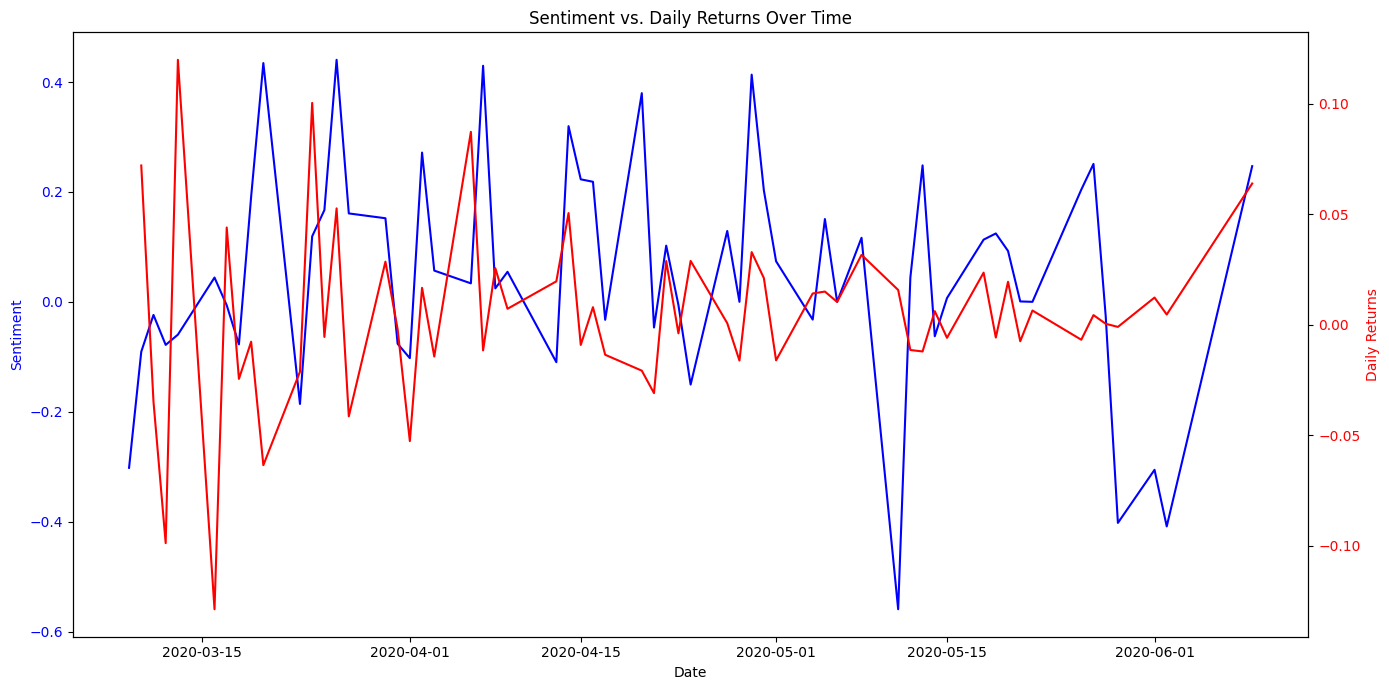

In [37]:
#Plot Daily return and Sentiment Score
import matplotlib.pyplot as plt

# Ensure the 'Date' column is in datetime format
apple_aggregate_data['Date'] = pd.to_datetime(apple_aggregate_data['Date'])

# Plot Sentiment and Daily Returns
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot Sentiment on the first y-axis
ax1.plot(apple_aggregate_data['Date'], apple_aggregate_data['Sentiment'], color='blue', label='Sentiment')
ax1.set_xlabel('Date')
ax1.set_ylabel('Sentiment', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for Daily Returns
ax2 = ax1.twinx()
ax2.plot(apple_aggregate_data['Date'], apple_aggregate_data['Daily Returns'], color='red', label='Daily Returns')
ax2.set_ylabel('Daily Returns', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Set the title of the plot
plt.title('Sentiment vs. Daily Returns Over Time')

# Improve the layout
fig.tight_layout()

# Show the plot
plt.show()


## Correlation for Amazon

In [38]:
#Extract company's sentiment data
amazon_sentiment_data=sentiment_data[sentiment_data['stock']=='AMZN']

In [39]:
# Group by 'date_only' and calculate the mean of 'compound'
result_df = amazon_sentiment_data.groupby('date_only')['compound'].mean().reset_index()
# Rename columns
result_df.columns = ['Date', 'Sentiment']

In [42]:
#combining result_df with stock data which have matching dates
amazon_aggregate_data = pd.merge(amazon_stock_data, result_df, left_on='Date', right_on='Date', how='inner')

In [44]:
#calculate daily returns
amazon_aggregate_data['Daily Returns'] = amazon_aggregate_data['Close'].pct_change()

In [45]:
# Calculate the Pearson correlation coefficient
from scipy.stats import pearsonr
cleaned_df = amazon_aggregate_data.dropna(subset=['Sentiment', 'Daily Returns'])
pearson_correlation, _ = pearsonr(cleaned_df['Sentiment'], cleaned_df['Daily Returns'])
print("Pearson correlation coefficient:", pearson_correlation)

Pearson correlation coefficient: 0.11949519173002607


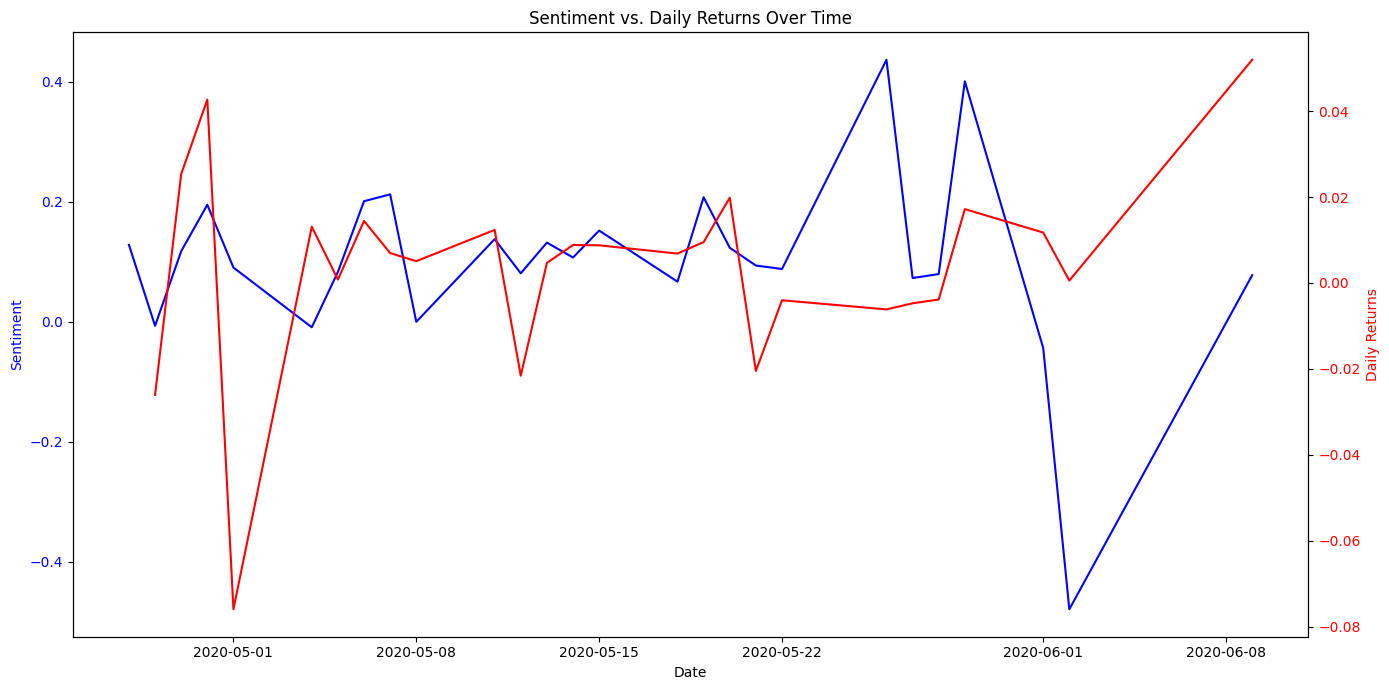

In [46]:
#Plot Daily return and Sentiment Score
import matplotlib.pyplot as plt
# Ensure the 'Date' column is in datetime format
amazon_aggregate_data['Date'] = pd.to_datetime(amazon_aggregate_data['Date'])
# Plot Sentiment and Daily Returns
fig, ax1 = plt.subplots(figsize=(14, 7))
# Plot Sentiment on the first y-axis
ax1.plot(amazon_aggregate_data['Date'], amazon_aggregate_data['Sentiment'], color='blue', label='Sentiment')
ax1.set_xlabel('Date')
ax1.set_ylabel('Sentiment', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
# Create a second y-axis for Daily Returns
ax2 = ax1.twinx()
ax2.plot(amazon_aggregate_data['Date'], amazon_aggregate_data['Daily Returns'], color='red', label='Daily Returns')
ax2.set_ylabel('Daily Returns', color='red')
ax2.tick_params(axis='y', labelcolor='red')
# Set the title of the plot
plt.title('Sentiment vs. Daily Returns Over Time')
# Improve the layout
fig.tight_layout()
# Show the plot
plt.show()


## Correlation for Google

In [47]:
#Extract company's sentiment data
google_sentiment_data=sentiment_data[sentiment_data['stock']=='GOOG']

In [48]:
# Group by 'date_only' and calculate the mean of 'compound'
result_df = google_sentiment_data.groupby('date_only')['compound'].mean().reset_index()
# Rename columns
result_df.columns = ['Date', 'Sentiment']

In [49]:
#combining result_df with stock data which have matching dates
google_aggregate_data = pd.merge(google_stock_data, result_df, left_on='Date', right_on='Date', how='inner')

In [56]:
#calculate daily returns
google_aggregate_data['Daily Returns'] = google_aggregate_data['Close'].pct_change()

In [54]:
# Calculate the Pearson correlation coefficient
from scipy.stats import pearsonr
cleaned_df = google_aggregate_data.dropna(subset=['Sentiment', 'Daily Returns'])
pearson_correlation, _ = pearsonr(cleaned_df['Sentiment'], cleaned_df['Daily Returns'])
print("Pearson correlation coefficient:", pearson_correlation)

Pearson correlation coefficient: 0.03828176785730201


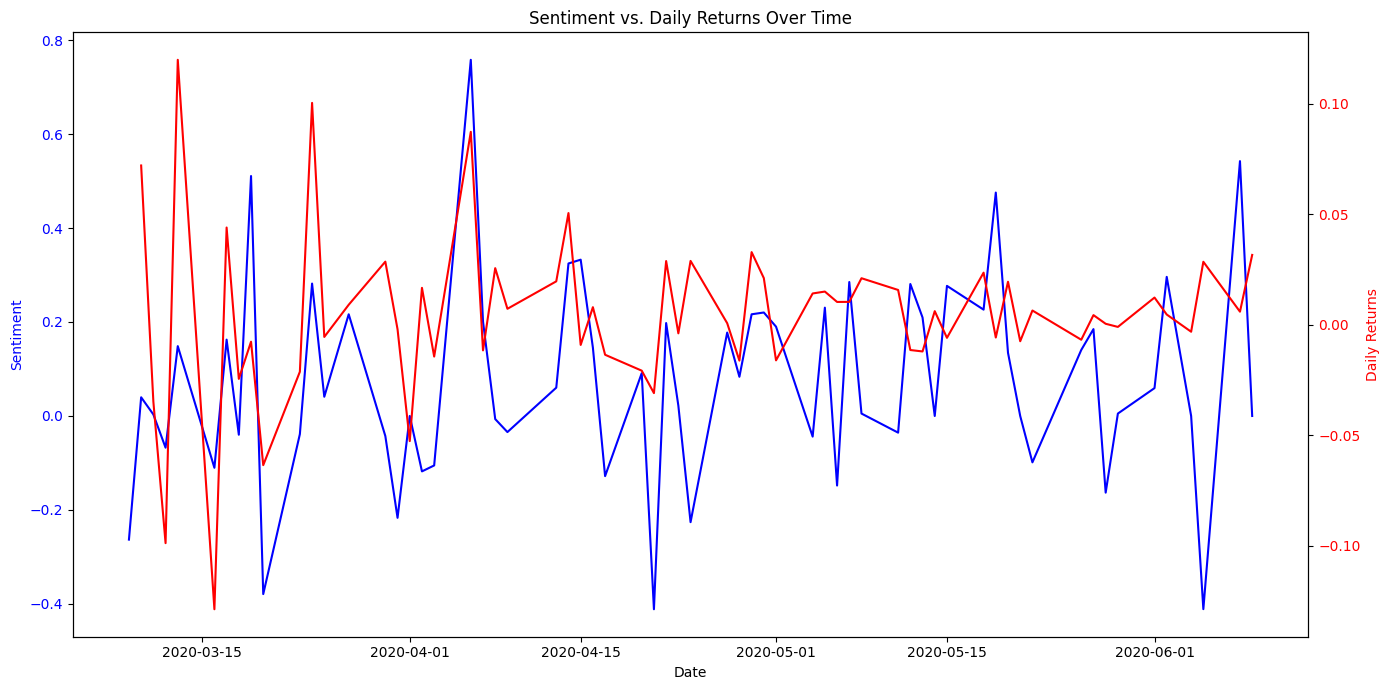

In [57]:
#Plot Daily return and Sentiment Score
import matplotlib.pyplot as plt
# Ensure the 'Date' column is in datetime format
google_aggregate_data['Date'] = pd.to_datetime(google_aggregate_data['Date'])
# Plot Sentiment and Daily Returns
fig, ax1 = plt.subplots(figsize=(14, 7))
# Plot Sentiment on the first y-axis
ax1.plot(google_aggregate_data['Date'], google_aggregate_data['Sentiment'], color='blue', label='Sentiment')
ax1.set_xlabel('Date')
ax1.set_ylabel('Sentiment', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
# Create a second y-axis for Daily Returns
ax2 = ax1.twinx()
ax2.plot(google_aggregate_data['Date'], google_aggregate_data['Daily Returns'], color='red', label='Daily Returns')
ax2.set_ylabel('Daily Returns', color='red')
ax2.tick_params(axis='y', labelcolor='red')
# Set the title of the plot
plt.title('Sentiment vs. Daily Returns Over Time')
# Improve the layout
fig.tight_layout()
# Show the plot
plt.show()

## Correlation for Tesla

In [58]:
#Extract company's sentiment data
tesla_sentiment_data=sentiment_data[sentiment_data['stock']=='TSLA']

In [59]:
# Group by 'date_only' and calculate the mean of 'compound'
result_df = tesla_sentiment_data.groupby('date_only')['compound'].mean().reset_index()
# Rename columns
result_df.columns = ['Date', 'Sentiment']


In [60]:
#combining result_df with stock data which have matching dates
tesla_aggregate_data = pd.merge(tesla_stock_data, result_df, left_on='Date', right_on='Date', how='inner')

In [64]:
#calculate daily returns
tesla_aggregate_data['Daily Returns'] = tesla_aggregate_data['Close'].pct_change()

In [65]:
# Calculate the Pearson correlation coefficient
from scipy.stats import pearsonr
cleaned_df = tesla_aggregate_data.dropna(subset=['Sentiment', 'Daily Returns'])
pearson_correlation, _ = pearsonr(cleaned_df['Sentiment'], cleaned_df['Daily Returns'])
print("Pearson correlation coefficient:", pearson_correlation)

Pearson correlation coefficient: 0.15618571031234768


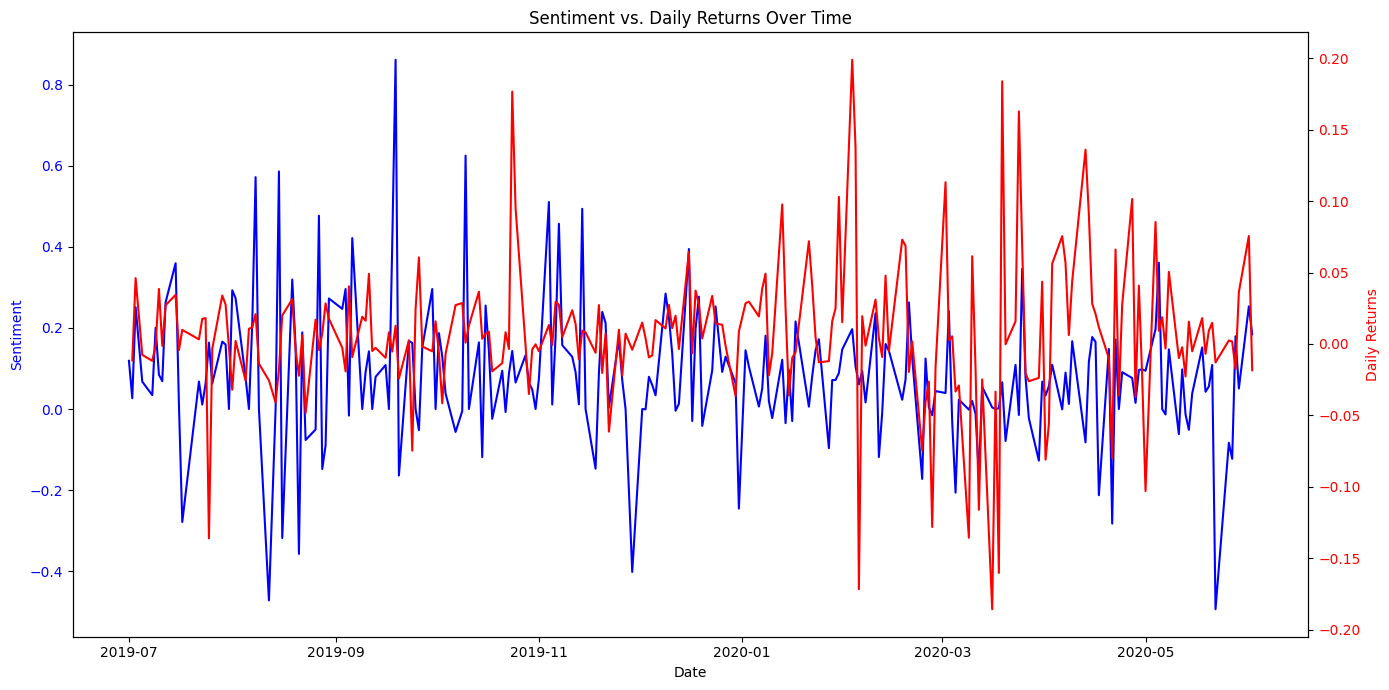

In [66]:
#Plot Daily return and Sentiment Score
import matplotlib.pyplot as plt
# Ensure the 'Date' column is in datetime format
tesla_aggregate_data['Date'] = pd.to_datetime(tesla_aggregate_data['Date'])
# Plot Sentiment and Daily Returns
fig, ax1 = plt.subplots(figsize=(14, 7))
# Plot Sentiment on the first y-axis
ax1.plot(tesla_aggregate_data['Date'], tesla_aggregate_data['Sentiment'], color='blue', label='Sentiment')
ax1.set_xlabel('Date')
ax1.set_ylabel('Sentiment', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
# Create a second y-axis for Daily Returns
ax2 = ax1.twinx()
ax2.plot(tesla_aggregate_data['Date'], tesla_aggregate_data['Daily Returns'], color='red', label='Daily Returns')
ax2.set_ylabel('Daily Returns', color='red')
ax2.tick_params(axis='y', labelcolor='red')
# Set the title of the plot
plt.title('Sentiment vs. Daily Returns Over Time')
# Improve the layout
fig.tight_layout()
# Show the plot
plt.show()